In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import pandas as pd

The following snippet loads the timeseries data from a csv file and plots it.   

In [ ]:
## Load the data from the CSV file
#csv_file_path = 'city_temperatures_sample_data.csv' ##you can set your own file path
#df = pd.read_csv(csv_file_path)

## Define the months and cities
#months = df.columns[1:]
#cities = df['City']
#data = df.iloc[:, 1:]

## Calculate the average temperature for each month
#average_temperatures = data.mean()

### Plot the time series data
#plt.figure(figsize=(10, 6))
#for city in cities:
    #plt.plot(months, data[cities == city].values[0], label=city)

#plt.xlabel('Month')
#plt.ylabel('Average Temperature (Celsius)')
#plt.title('Average Monthly Temperature in 2018')
#plt.legend()
#plt.grid(True)
#plt.show()

The timeseries data for our temperature over January 2018 - January 2019 for 5 different cities.

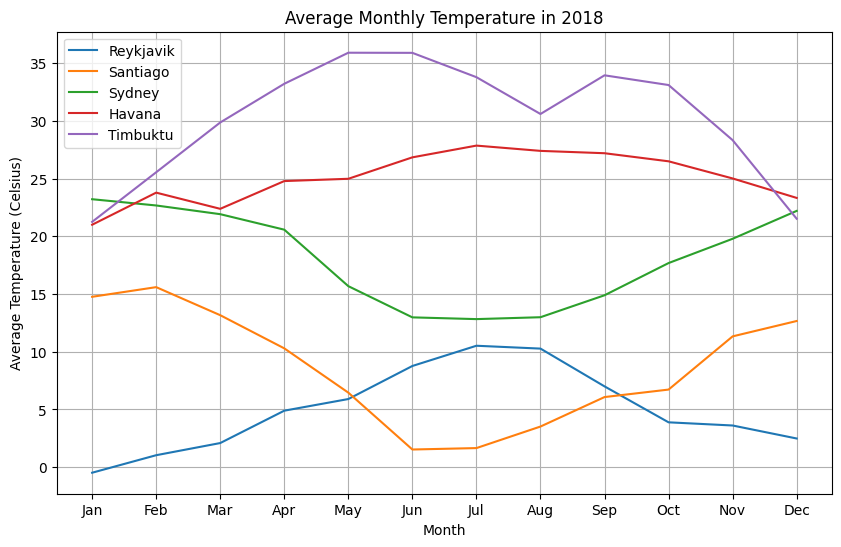

In [2]:
# Time series data for each city
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cities = {
    'Reykjavik': [-0.4793457, 1.037073, 2.090478, 4.893548, 5.902032, 8.764948, 10.51727, 10.27001, 6.998956, 3.885675, 3.610498, 2.484918],
    'Santiago': [14.75677, 15.59243, 13.16317, 10.29113, 6.455896, 1.531122, 1.654565, 3.520502, 6.072687, 6.721857, 11.32895, 12.66015],
    'Sydney': [23.20739, 22.6654, 21.91171, 20.56933, 15.67797, 12.97531, 12.82418, 12.98724, 14.88903, 17.67816, 19.78134, 22.19671],
    'Havana': [20.99673, 23.77703, 22.37524, 24.77865, 24.9768, 26.83322, 27.85049, 27.3933, 27.19058, 26.49029,  25.00533, 23.31976],
    'Timbuktu': [21.24587, 25.54165, 29.85293, 33.20483, 35.89431, 35.88308, 33.77602, 30.58798, 33.93725, 33.09615, 28.32308, 21.51644]
}

# Plot the time series data
plt.figure(figsize=(10, 6))
for city, data in cities.items():
    plt.plot(months, data, label=city)

plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.title('Average Monthly Temperature in 2018')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import random

for i in range(5):
  random.seed(0)

  print(random.randint(1,1000))

865
865
865
865
865


The following snip creates our initial fixed network that is randomly generated with a total of 50 nodes, with 35 common men who start out with 'neutral' opinion, 5 ecologists with 'for' opinion and 10 businessmen with 'against' opinion.

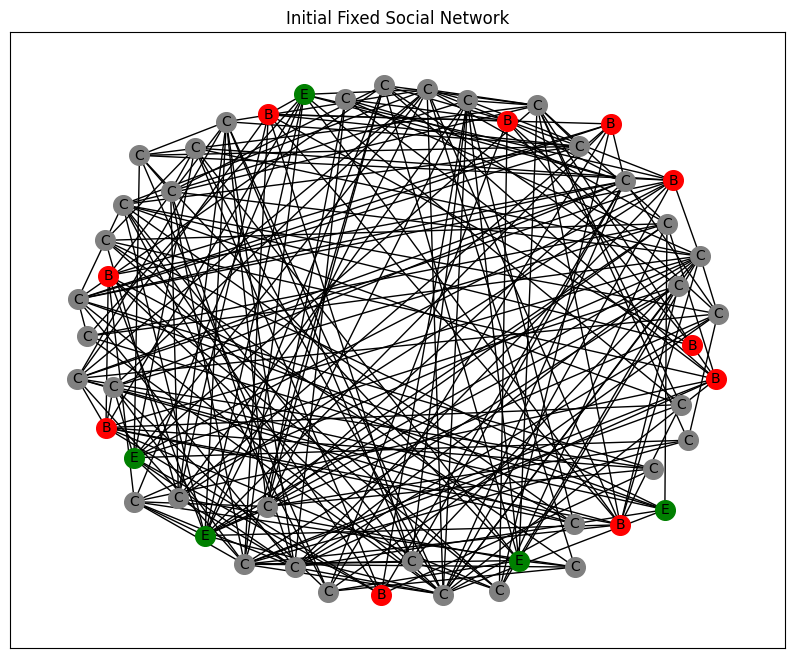

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Set a seed for reproducibility
np.random.seed(52)

# Set up the fixed social network (random graph) with common people (35), ecologists (5), and businessmen (10)
nodes = list(range(50))  # Nodes representing agents from 0 to 49
social_network = nx.fast_gnp_random_graph(50, 0.2)  # Probability of an edge between nodes is 0.2
while not nx.is_connected(social_network):  # Ensure the graph is connected
    social_network = nx.fast_gnp_random_graph(50, 0.2)

# Assign roles to agents (0: common men, 1: ecologists, 2: businessmen)
roles = [0] * 35 + [1] * 5 + [2] * 10

# Initialize the opinions of agents based on roles
opinions = ['against' if roles[node] == 2 else 'for' if roles[node] == 1 else 'neutral' for node in nodes]

# Plot the initial fixed social network with node colors and labels
G = nx.Graph()
G.add_nodes_from(nodes)

# Assign node colors based on opinions and node labels based on roles
node_colors = {'for': 'green', 'against': 'red', 'neutral': 'gray'}
node_labels = {0: 'C', 1: 'E', 2: 'B'}

# Generate node positions using spring layout algorithm (random arrangement)
pos = nx.spring_layout(G)

# Set the figure size to spread out the nodes
plt.figure(figsize=(10, 8))

# Add edges with black color
nx.draw_networkx_edges(G, pos, edgelist=social_network.edges(), edge_color='black')

# Add nodes with corresponding colors and labels
for node in G.nodes():
    opinion_color = node_colors[opinions[node]]
    role_label = node_labels[roles[node]]
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=opinion_color, node_size=200)
    nx.draw_networkx_labels(G, pos, labels={node: role_label}, font_size=10, font_color='black')

plt.title("Initial Fixed Social Network")
plt.show()


Degroot Model

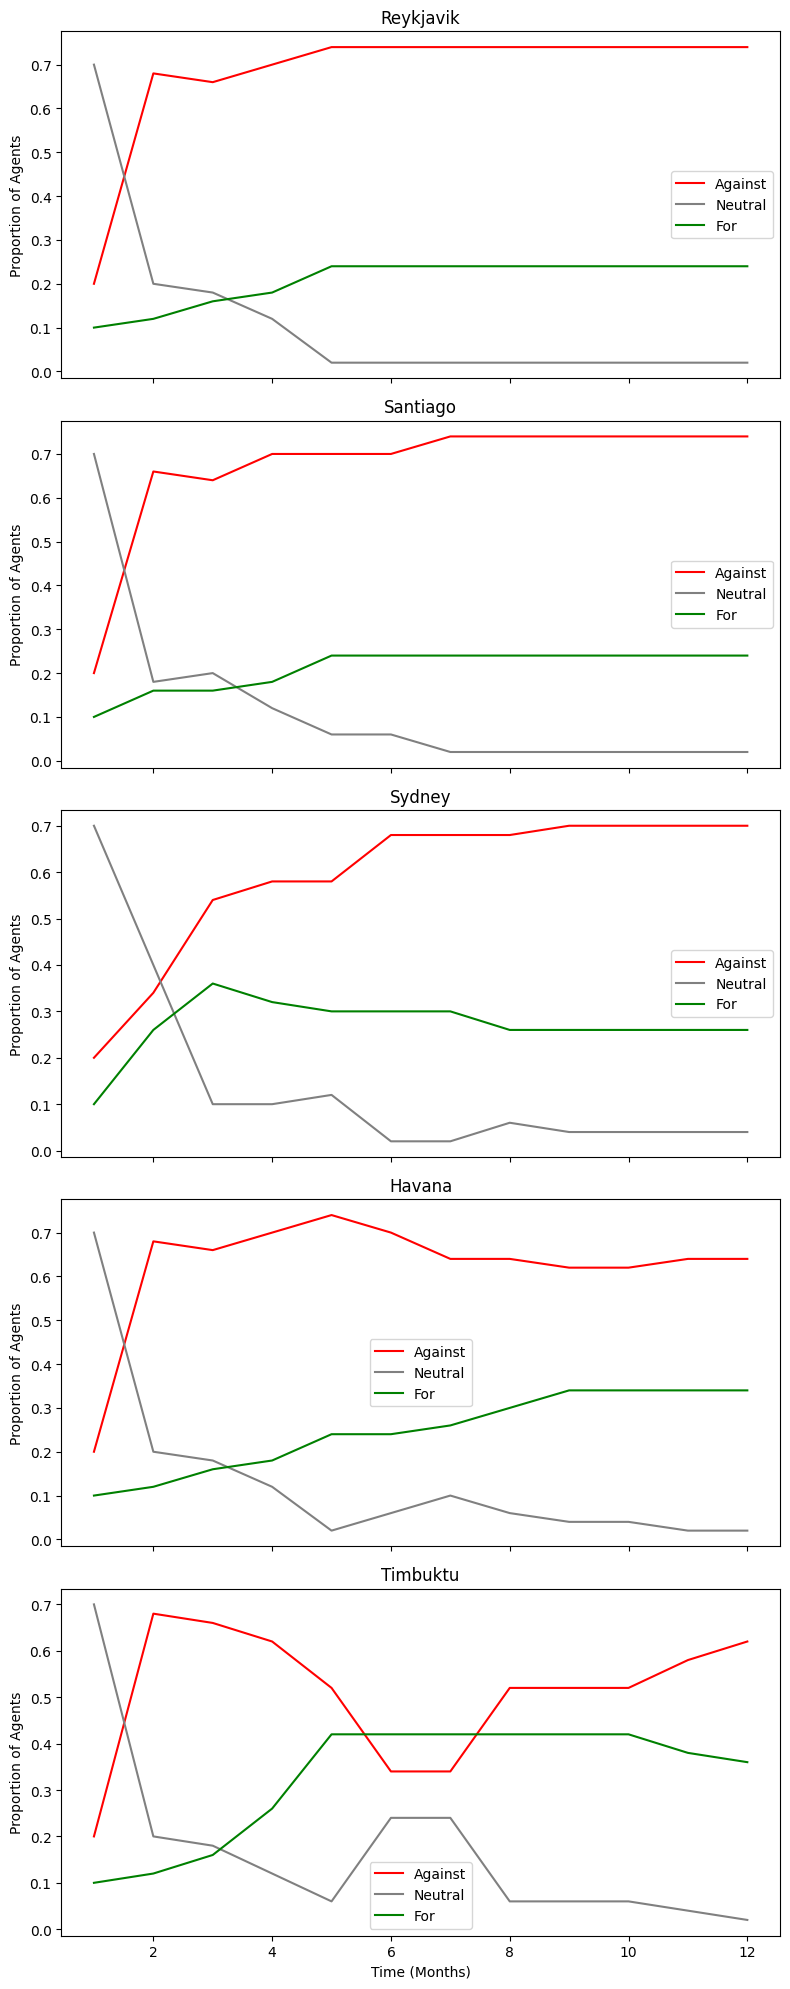

In [11]:
#Defining some of the influence parameters
a_ee = 0.2
a_ec = 0.3
a_eb = 0.4
a_cc = 0.2
a_cb = 0.3
a_bb = 0.2
gamma = 0.2

# Define the influence function for temperature influence (gamma)
def influence_function(temperature, threshold):
    return max(0, temperature - threshold)

def update_opinions(opinions, city_temperature, city, gamma,month):
  if month ==0:
    return opinions
  else:
    new_opinions = opinions.copy()
    temperature_influence = gamma * max(0,city_temperature[month] - thresholds[city])
    for i in range(len(opinions)):
        # Calculate the influence of temperature on the opinion

        # Get the neighbors of the current node
        neighbors = list(social_network.neighbors(i))
        # Calculate the neighbor opinions based on roles
        neighbor_opinions = [opinions1[j] for j in neighbors]
        # Calculate the weighted sum of neighbor opinions based on interactions
        neighbor_sum = (a_ee+a_cb) * sum([neighbor_opinions[j] for j in range(len(neighbors)) if roles[neighbors[j]] == 1]) \
                        + (a_ec+a_cc) * sum([neighbor_opinions[j] for j in range(len(neighbors)) if roles[neighbors[j]] == 0]) \
                        + (a_eb+a_bb) * sum([neighbor_opinions[j] for j in range(len(neighbors)) if roles[neighbors[j]] == 2])

        # Update the opinion for the current node
        new_opinions[i] += neighbor_sum + temperature_influence

        # Ensure the updated opinion is within the valid range [-1, 1]
        new_opinions[i] = max(-1, min(1, new_opinions[i]))

    # Update the opinions list for the next time step
    return new_opinions



# Simulate the time evolution of opinions for each city
average_opinions = {city: [] for city in cities.keys()}
num_time_steps = 12

for city in cities.keys():
    for t in range(num_time_steps):
      if t==0:
        new_opinions = update_opinions(opinions1, cities[city], city, gamma,t)
        average_opinions[city].append(new_opinions.copy())
      else:
        new_opinions = update_opinions(average_opinions[city][-1], cities[city], city, gamma,t)
        average_opinions[city].append(new_opinions.copy())

# Plot the time evolution of average opinions for each city
fig, axs = plt.subplots(5, 1, figsize=(8, 20), sharex=True)
colors = ['red', 'gray', 'green']

for i, city in enumerate(cities.keys()):
  against_values = []
  neutral_values = []
  for_values = []
  for t in range(num_time_steps):
    # print(average_opinions[city][0])
    against_values.append(sum(1 for opinion in average_opinions[city][t] if -1 <= opinion <= -0.4) / len(average_opinions[city][t]))
    neutral_values.append([sum(1 for opinion in average_opinions[city][t] if -0.4 < opinion < 0.4) / len(average_opinions[city][t])])
    for_values.append(sum(1 for opinion in average_opinions[city][t] if 0.4 <= opinion <= 1) / len(average_opinions[city][t]))

  axs[i].plot(range(1, num_time_steps + 1), against_values, color=colors[0], label='Against')
  axs[i].plot(range(1, num_time_steps + 1), neutral_values, color=colors[1], label='Neutral')
  axs[i].plot(range(1, num_time_steps + 1), for_values, color=colors[2], label='For')

  axs[i].set_title(city)
  axs[i].set_ylabel('Proportion of Agents')
  axs[i].legend()

plt.xlabel('Time (Months)')
plt.tight_layout()
plt.show()


In [ ]:
print(len(average_opinions['Reykjavik'][2]))

50


In [ ]:
print(opinions1)

[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [ ]:
print(average_opinions)

{'Reykjavik': [[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -0.3500000000000001, -1, -0.6000000000000001, -0.10000000000000009, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -0.3500000000000001, -1, -0.6000000000000001, -0.10000000000000009, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -0.3500000000000001, -1, -0.6000000000000001, -0.10000000000000009, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -0.3500000000000001, -1, -0.6000000000000001, -0.10000000000000009, -1, -1, -1, -1

Friedkin-Johnsen Model

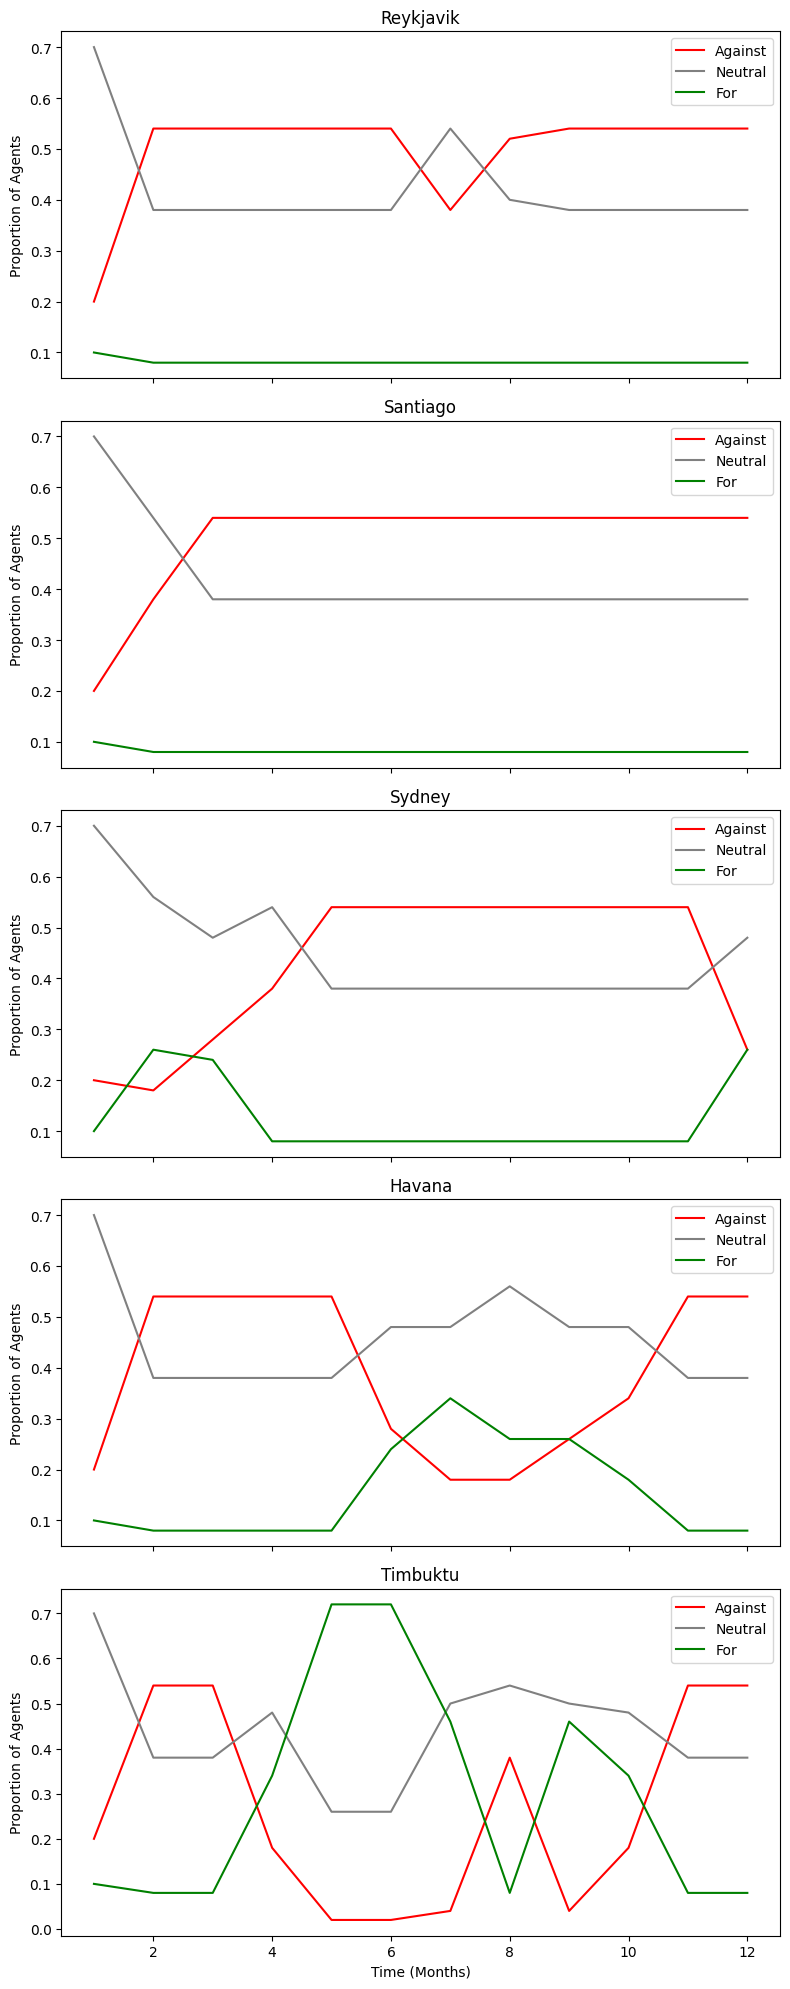

In [14]:
#Defining some of the influence parameters
s_c = 0.75
s_b = 0.35
s_e = 0.2
gamma = 0.2

# Define the influence function for temperature influence (gamma)
def influence_function(temperature, threshold):
    return max(0, temperature - threshold)

def update_opinions(opinions, city_temperature, city, gamma, month):
    if month == 0:
        return opinions
    else:
        new_opinions = opinions.copy()
        temperature_influence = gamma * max(0, city_temperature[month] - thresholds[city])
        for i in range(len(opinions)):
            # Calculate the influence of temperature on the opinion

            # Get the neighbors of the current node
            neighbors = list(social_network.neighbors(i))

            # Calculate the neighbor opinions based on roles
            neighbor_opinions = [opinions1[j] for j in neighbors]

            # Calculate the weighted sum of neighbor opinions based on interactions
            neighbor_sum = 0
            for j in range(len(neighbors)):
                neighbor_role = roles[neighbors[j]]
                if neighbor_role == 1:  # Ecologist
                    neighbor_sum += s_e * neighbor_opinions[j] + (1 - s_e) * opinions1[1]
                elif neighbor_role == 2:  # Businessman
                    neighbor_sum += s_b * neighbor_opinions[j] + (1 - s_b) * opinions1[2]
                else:  # Common people
                    neighbor_sum += s_c * neighbor_opinions[j] + (1 - s_c) * opinions1[0]

            # Calculate the updated opinion using the provided formula
            updated_opinion = neighbor_sum

            # Update the opinion for the current node
            new_opinions[i] = updated_opinion + temperature_influence

            # Ensure the updated opinion is within the valid range [-1, 1]
            new_opinions[i] = max(-1, min(1, new_opinions[i]))

        # Update the opinions list for the next time step
        return new_opinions


# Simulate the time evolution of opinions for each city
average_opinions = {city: [] for city in cities.keys()}
num_time_steps = 12

for city in cities.keys():
    for t in range(num_time_steps):
      if t==0:
        new_opinions = update_opinions(opinions1, cities[city], city, gamma,t)
        average_opinions[city].append(new_opinions.copy())
      else:
        new_opinions = update_opinions(average_opinions[city][-1], cities[city], city, gamma,t)
        average_opinions[city].append(new_opinions.copy())

# Plot the time evolution of average opinions for each city
fig, axs = plt.subplots(5, 1, figsize=(8, 20), sharex=True)
colors = ['red', 'gray', 'green']

for i, city in enumerate(cities.keys()):
  against_values = []
  neutral_values = []
  for_values = []
  for t in range(num_time_steps):
    # print(average_opinions[city][0])
    against_values.append(sum(1 for opinion in average_opinions[city][t] if -1 <= opinion <= -0.4) / len(average_opinions[city][t]))
    neutral_values.append([sum(1 for opinion in average_opinions[city][t] if -0.4 < opinion < 0.4) / len(average_opinions[city][t])])
    for_values.append(sum(1 for opinion in average_opinions[city][t] if 0.4 <= opinion <= 1) / len(average_opinions[city][t]))

  axs[i].plot(range(1, num_time_steps + 1), against_values, color=colors[0], label='Against')
  axs[i].plot(range(1, num_time_steps + 1), neutral_values, color=colors[1], label='Neutral')
  axs[i].plot(range(1, num_time_steps + 1), for_values, color=colors[2], label='For')

  axs[i].set_title(city)
  axs[i].set_ylabel('Proportion of Agents')
  axs[i].legend()

plt.xlabel('Time (Months)')
plt.tight_layout()
plt.show()


Stochastic Bounded Confidence Model


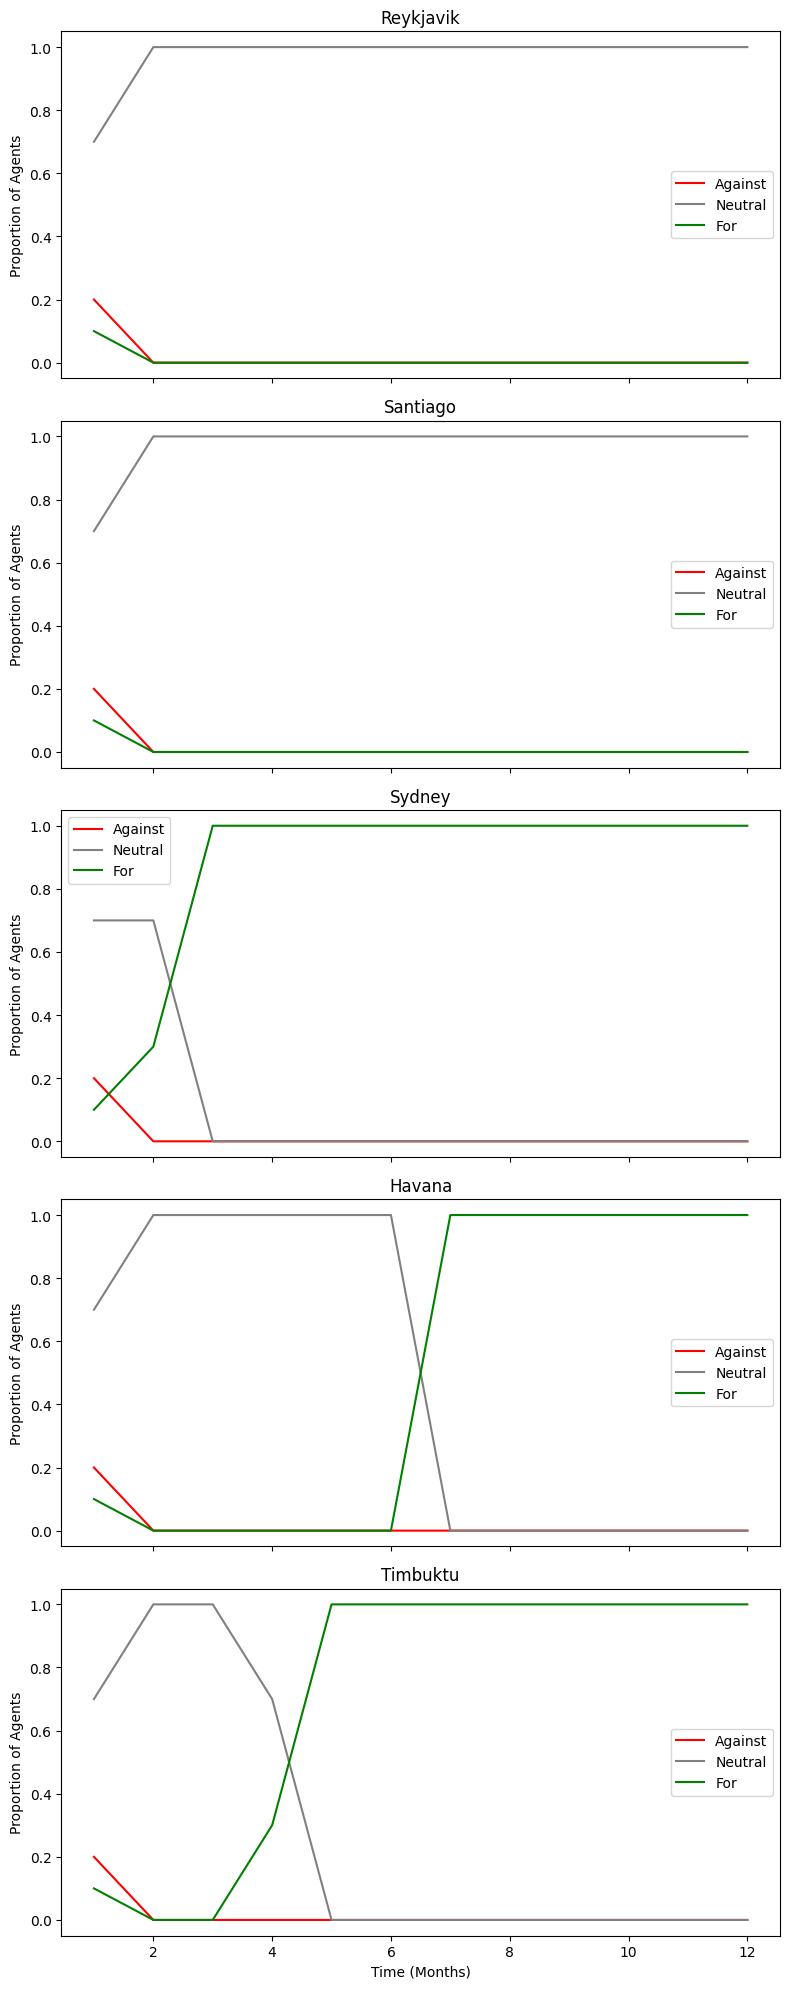

In [13]:
#Defining some of the influence parameters

gamma = 0.2

# Define the influence function for temperature influence (gamma)
def influence_function(temperature, threshold):
    return max(0, temperature - threshold)

#Defining the bounded confidence parameter
delta = 0.9 #Can adjust this value according to your requirements
rho = 1

def prob(u,v,opinions,rho):
  if np.abs(opinions[u]-opinions[v])!=0:
    a = np.abs(opinions[u]-opinions[v]).astype(float)**(-rho)
    b = np.abs(opinions[u]-opinions)
    idx = np.where(b>0)
    b = np.sum(b[idx].astype(float)**(-rho))
    return a/b
  else:
    return 0

def update_opinions(opinions, city_temperature, city, gamma, month):
    if month == 0:
        return opinions
    else:
        new_opinions = opinions.copy()
        opinions = np.array(opinions)
        temperature_influence = gamma * max(0, city_temperature[month] - thresholds[city])
        for i in range(len(opinions)):
            # Calculate the influence of temperature on the opinion

            # Get the neighbors of the current node
            neighbors = list(social_network.neighbors(i))

            # Calculate the neighbor opinions based on roles
            neighbor_opinions = [opinions1[j] for j in neighbors]

            # Calculate the weighted sum of neighbor opinions based on interactions


            # SBCM
            bounded_confidence_influence = 0
            for j in range(len(opinions)):
              if i!=j:
                bounded_confidence_influence += (opinions[j] - opinions[i])*prob(i,j,opinions,rho)

            # Update the opinion for the current node
            new_opinions[i] += temperature_influence + bounded_confidence_influence

            # # Ensure the updated opinion is within the valid range [-1, 1]
            new_opinions[i] = max(-1, min(1, new_opinions[i]))

        # Update the opinions list for the next time step
        return new_opinions



# Simulate the time evolution of opinions for each city
average_opinions = {city: [] for city in cities.keys()}
num_time_steps = 12

for city in cities.keys():
    for t in range(num_time_steps):
      if t==0:
        new_opinions = update_opinions(opinions1, cities[city], city, gamma,t)
        average_opinions[city].append(new_opinions.copy())
      else:
        new_opinions = update_opinions(average_opinions[city][-1], cities[city], city, gamma,t)
        average_opinions[city].append(new_opinions.copy())

# Plot the time evolution of average opinions for each city
fig, axs = plt.subplots(5, 1, figsize=(8, 20), sharex=True)
colors = ['red', 'gray', 'green']

for i, city in enumerate(cities.keys()):
  against_values = []
  neutral_values = []
  for_values = []
  for t in range(num_time_steps):
    # print(average_opinions[city][0])
    against_values.append(sum(1 for opinion in average_opinions[city][t] if -1 <= opinion <= -0.4) / len(average_opinions[city][t]))
    neutral_values.append([sum(1 for opinion in average_opinions[city][t] if -0.4 < opinion < 0.4) / len(average_opinions[city][t])])
    for_values.append(sum(1 for opinion in average_opinions[city][t] if 0.4 <= opinion <= 1) / len(average_opinions[city][t]))

  axs[i].plot(range(1, num_time_steps + 1), against_values, color=colors[0], label='Against')
  axs[i].plot(range(1, num_time_steps + 1), neutral_values, color=colors[1], label='Neutral')
  axs[i].plot(range(1, num_time_steps + 1), for_values, color=colors[2], label='For')

  axs[i].set_title(city)
  axs[i].set_ylabel('Proportion of Agents')
  axs[i].legend()

plt.xlabel('Time (Months)')
plt.tight_layout()
plt.show()


In [ ]:
print(1**(-rho))

1.0


Bounded Confidence Model

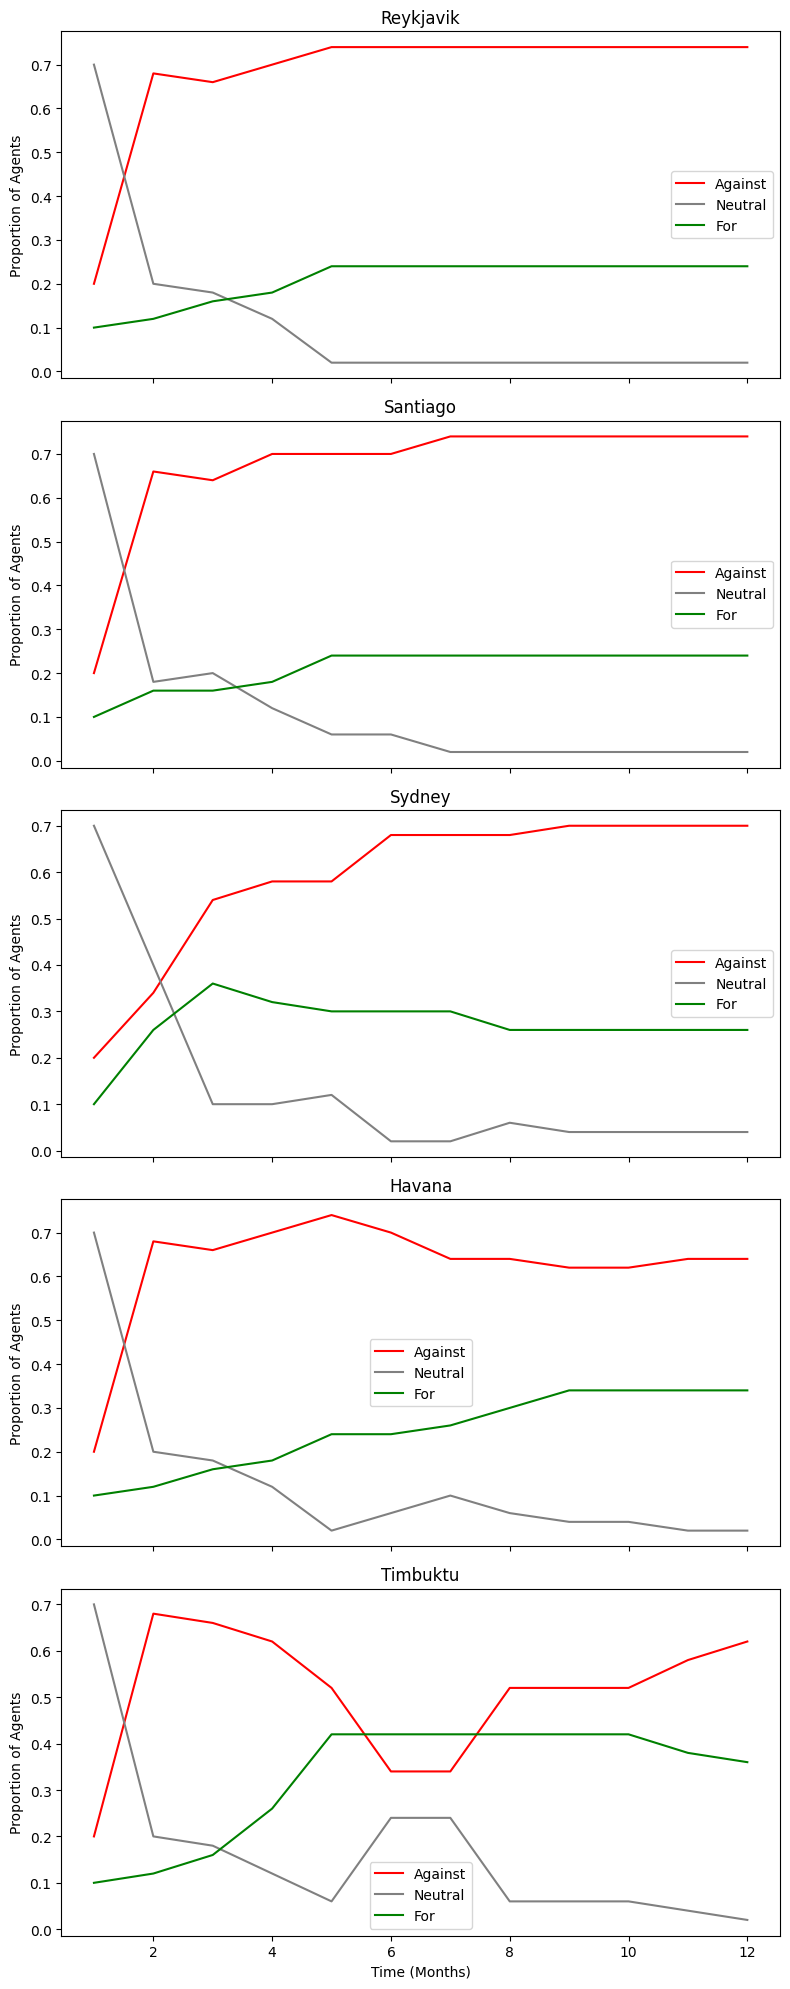

In [12]:
#Defining some of the influence parameters
a_ee = 0.2
a_ec = 0.3
a_eb = 0.4
a_cc = 0.2
a_cb = 0.3
a_bb = 0.2
gamma = 0.2

# Define the influence function for temperature influence (gamma)
def influence_function(temperature, threshold):
    return max(0, temperature - threshold)

def update_opinions(opinions, city_temperature, city, gamma,month):
  if month ==0:
    return opinions
  else:
    new_opinions = opinions.copy()
    temperature_influence = gamma * max(0,city_temperature[month] - thresholds[city])
    for i in range(len(opinions)):
        # Calculate the influence of temperature on the opinion

        # Get the neighbors of the current node
        neighbors = list(social_network.neighbors(i))
        # Calculate the neighbor opinions based on roles
        neighbor_opinions = [opinions1[j] for j in neighbors]
        # Calculate the weighted sum of neighbor opinions based on interactions
        neighbor_sum = (a_ee+a_cb) * sum([neighbor_opinions[j] for j in range(len(neighbors)) if roles[neighbors[j]] == 1]) \
                        + (a_ec+a_cc) * sum([neighbor_opinions[j] for j in range(len(neighbors)) if roles[neighbors[j]] == 0]) \
                        + (a_eb+a_bb) * sum([neighbor_opinions[j] for j in range(len(neighbors)) if roles[neighbors[j]] == 2])

        # Update the opinion for the current node
        new_opinions[i] += neighbor_sum + temperature_influence

        # Ensure the updated opinion is within the valid range [-1, 1]
        new_opinions[i] = max(-1, min(1, new_opinions[i]))

    # Update the opinions list for the next time step
    return new_opinions



# Simulate the time evolution of opinions for each city
average_opinions = {city: [] for city in cities.keys()}
num_time_steps = 12

for city in cities.keys():
    for t in range(num_time_steps):
      if t==0:
        new_opinions = update_opinions(opinions1, cities[city], city, gamma,t)
        average_opinions[city].append(new_opinions.copy())
      else:
        new_opinions = update_opinions(average_opinions[city][-1], cities[city], city, gamma,t)
        average_opinions[city].append(new_opinions.copy())

# Plot the time evolution of average opinions for each city
fig, axs = plt.subplots(5, 1, figsize=(8, 20), sharex=True)
colors = ['red', 'gray', 'green']

for i, city in enumerate(cities.keys()):
  against_values = []
  neutral_values = []
  for_values = []
  for t in range(num_time_steps):
    # print(average_opinions[city][0])
    against_values.append(sum(1 for opinion in average_opinions[city][t] if -1 <= opinion <= -0.4) / len(average_opinions[city][t]))
    neutral_values.append([sum(1 for opinion in average_opinions[city][t] if -0.4 < opinion < 0.4) / len(average_opinions[city][t])])
    for_values.append(sum(1 for opinion in average_opinions[city][t] if 0.4 <= opinion <= 1) / len(average_opinions[city][t]))

  axs[i].plot(range(1, num_time_steps + 1), against_values, color=colors[0], label='Against')
  axs[i].plot(range(1, num_time_steps + 1), neutral_values, color=colors[1], label='Neutral')
  axs[i].plot(range(1, num_time_steps + 1), for_values, color=colors[2], label='For')

  axs[i].set_title(city)
  axs[i].set_ylabel('Proportion of Agents')
  axs[i].legend()

plt.xlabel('Time (Months)')
plt.tight_layout()
plt.show()
